<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

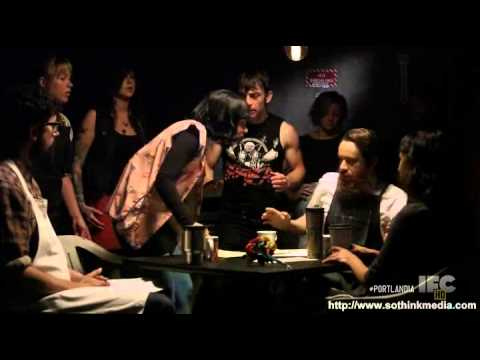

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\MyLearning\\23-LSDS\\04-LSDS17-U4\\U4S1-NLP\\module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url )
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
# Start here 

## 1. How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

### **First: EDA**

In [5]:
shops['rating'] = shops['star_rating'].str.replace(' ','').str.replace('.0starrating','').astype(int) 

In [6]:
shops['overal'] = shops['rating'].apply(lambda x: 'good' if x>=4 else 'bad' )

In [7]:
shops.head(5)

,coffee_shop_name,full_review_text,star_rating,rating,overal
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5,good
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4,good
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4,good
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2,bad
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4,good


In [8]:
shops['rating'].value_counts()

5    3780
4    2360
3     738
2     460
1     278
Name: rating, dtype: int64

In [9]:
# Percentage of good & bad

shops['overal'].value_counts(normalize = True)*100

good    80.619748
bad     19.380252
Name: overal, dtype: float64

In [10]:
print(shops.shape)
shops.dtypes

(7616, 5)


coffee_shop_name    object
full_review_text    object
star_rating         object
rating               int32
overal              object
dtype: object

### Analyze Text

In [11]:
# shops['full_review_text'].value_counts()

In [12]:
# Make every word in lowercase

shops['coffee_shop_name'] = shops['coffee_shop_name'].str.lower()

In [13]:
shops['coffee_shop_name'].value_counts()

epoch coffee                            400
halcyon                                 300
the factory - cafe with a soul          244
venezia italian gelato                  200
houndstooth coffee                      200
                                       ... 
lucky lab coffee                         25
sister coffee                            17
kowabunga coffee                         16
the marvelous vintage tea party co.      10
lola savannah coffee downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

In [14]:
# shops['coffee_shop_name'].value_counts(normalize=True)[:10]

In [15]:
sample0 = "What a fantastic atmosphere. I dropped in to catch up on some work and found a fantastic atmosphere and a great staff. I wish I could work here every day. I had the Darling pour-over and olive bread, and camped out near the pop-art fabric fire in the fireplace nook. Wallace (owner) and his team were spot-on with service and help. Full disclosure: The place is so beautiful on the inside that I Instagrammed it - couldn't help it, I claimed it for my own, like dozens of other folks. Highly recommended, so get here when you can! "
# print(sample0)

In [16]:
import re

re.sub('[^a-zA-Z 0-9]', '', sample0)

'What a fantastic atmosphere I dropped in to catch up on some work and found a fantastic atmosphere and a great staff I wish I could work here every day I had the Darling pourover and olive bread and camped out near the popart fabric fire in the fireplace nook Wallace owner and his team were spoton with service and help Full disclosure The place is so beautiful on the inside that I Instagrammed it  couldnt help it I claimed it for my own like dozens of other folks Highly recommended so get here when you can '

In [17]:
# These imports must exist before stemming

import nltk
from nltk.stem import PorterStemmer

porter = PorterStemmer()
lancaster = nltk.LancasterStemmer()

In [18]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [19]:
# sample1 = "I went on a Saturday night about 8:00 to get some homework finished. My black ice tea was great! There were about 4 other people in there and two employees.  About 9:00 one of the employees not so discretely dimmed the lights. It was too dark to ready anymore so I stitched to working on my computer. Less than 10 minutes later I was informed by the same employee they would be closing early tonight.  So don't expect to stay until their posted hours. I'll take my business to Starbucks where you don't get kicked out early. And they don't turn the lights down on you."

In [20]:
# tokenize(sample1)[:10]

In [21]:
# Try to use column from DF

my_word = str(shops['full_review_text'][0:1])
my_word

'0     11/25/2016 1 check-in Love love loved the atm...\nName: full_review_text, dtype: object'

In [22]:
tokenize(my_word)

['0',
 '11252016',
 '1',
 'checkin',
 'love',
 'love',
 'loved',
 'the',
 'atmname',
 'fullreviewtext',
 'dtype',
 'object']

#### Analyzing Tokens

In [23]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [24]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(20)


[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546),
 ('it', 9379),
 ('for', 8680),
 ('this', 6583),
 ('but', 6501),
 ('with', 6332),
 ('my', 6202),
 ('they', 6165),
 ('that', 6151),
 ('you', 5847),
 ('place', 5426)]

In [25]:
shops[['full_review_text', 'tokens']][:10]

,full_review_text,tokens
0,11/25/2016 1 check-in Love love loved the atm...,"[11252016, 1, checkin, love, love, loved, the,..."
1,"12/2/2016 Listed in Date Night: Austin, Ambia...","[1222016, listed, in, date, night, austin, amb..."
2,11/30/2016 1 check-in Listed in Brunch Spots ...,"[11302016, 1, checkin, listed, in, brunch, spo..."
3,11/25/2016 Very cool decor! Good drinks Nice ...,"[11252016, very, cool, decor, good, drinks, ni..."
4,12/3/2016 1 check-in They are located within ...,"[1232016, 1, checkin, they, are, located, with..."
5,11/20/2016 1 check-in Very cute cafe! I think...,"[11202016, 1, checkin, very, cute, cafe, i, th..."
6,"10/27/2016 2 check-ins Listed in ""Nuptial Cof...","[10272016, 2, checkins, listed, in, nuptial, c..."
7,11/2/2016 2 check-ins Love this place! 5 sta...,"[1122016, 2, checkins, love, this, place, 5, s..."
8,"10/25/2016 1 check-in Ok, let's try this appr...","[10252016, 1, checkin, ok, lets, try, this, ap..."
9,11/10/2016 3 check-ins This place has been sh...,"[11102016, 3, checkins, this, place, has, been..."


## Another way of tokenizing (....not the best) 
https://stackoverflow.com/questions/58229402/how-to-tokenize-multiple-columns-of-a-pandas-dataframe-for-nlp

In [26]:
import spacy
nlp = spacy.load('en_core_web_lg')

def tokenize(text):
    return [tok.text for tok in nlp.tokenizer(text) if not tok.is_stop]

shops['token'] = shops['full_review_text'].apply(lambda x: tokenize(x))
shops['another_token'] = shops['coffee_shop_name'].apply(lambda y: tokenize(y))

In [27]:
# These imports must exist before stemming

import nltk
from nltk.stem import PorterStemmer

porter = PorterStemmer()
lancaster = nltk.LancasterStemmer()

In [28]:
# From the DF, decide which sentence we want to extract

shops['full_review_text'][0:1]

0     11/25/2016 1 check-in Love love loved the atm...
Name: full_review_text, dtype: object

In [29]:
# Show reviews.text line 4  and put it as a list of strings

wordlist = re.split('\s+', str(shops['full_review_text'][0:1]))
wordlist

['0',
 '11/25/2016',
 '1',
 'check-in',
 'Love',
 'love',
 'loved',
 'the',
 'atm...',
 'Name:',
 'full_review_text,',
 'dtype:',
 'object']

In [30]:
# Compare

print("{0:20}{1:20}{2:20}".format("Word", "Porter Stemmer", "lancaster Stemmer"))

for word in wordlist:
    print("{0:20}{1:20}{2:20}".format(word, porter.stem(word), lancaster.stem(word)))
    

Word                Porter Stemmer      lancaster Stemmer   
0                   0                   0                   
11/25/2016          11/25/2016          11/25/2016          
1                   1                   1                   
check-in            check-in            check-in            
Love                love                lov                 
love                love                lov                 
loved               love                lov                 
the                 the                 the                 
atm...              atm...              atm...              
Name:               name:               name:               
full_review_text,   full_review_text,   full_review_text,   
dtype:              dtype:              dtype:              
object              object              object              


### From:   
|https://www.youtube.com/watch?v=Dh4El5MtxpE

### Count # words & regex

In [31]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546)]

In [32]:
# Use category for test

shops['tokens'] = shops['full_review_text'].apply(tokenize)
# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('.', 46950),
 ('the', 34809),
 (',', 29948),
 ('and', 26650),
 ('a', 22755),
 (' ', 22606),
 ('i', 20237),
 ('coffee', 19983),
 ('to', 17164),
 ('of', 12600)]

## How to tokenize perfectly from a dataframe?

### Function to tokenize

In [33]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [34]:
# Use the Function
wc = count(shops['tokens'])

In [35]:
wc.head(10)
# wc.tail()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
26,.,7367,46950,1.0,0.092611,0.092611,0.967306
31,",",6067,29948,2.0,0.059074,0.151685,0.796612
5,,7616,22606,3.0,0.044591,0.196276,1.000000
3,!,4053,9993,4.0,0.019712,0.215988,0.532169
24,coffee,4699,9630,5.0,0.018996,0.234983,0.616991
23,-,4268,8090,6.0,0.015958,0.250941,0.560399
113,place,3640,5401,7.0,0.010654,0.261595,0.477941
266,good,2573,3585,8.0,0.007072,0.268667,0.337841
208,),2138,3481,9.0,0.006866,0.275533,0.280725
204,(,2090,3309,10.0,0.006527,0.282060,0.274422


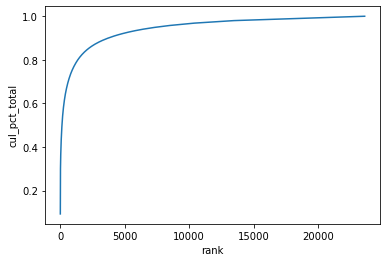

In [36]:
import seaborn as sns

# Cumulative Distribution Plot
# sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 5})

sns.lineplot(x='rank', y='cul_pct_total', data=wc);

## 2. Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

### Answer: make 2 DF's:  based on "good"  and  "bad",  and visualize both of them in Treemaps.

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [52]:
shops_good = shops[shops['overal'] =='good']
shops_bad = shops[shops['overal'] =='bad']

In [54]:
print(shops_good.shape, shops_bad.shape)

(6140, 8) (1476, 8)


In [55]:
# on SHPS_GOOD

shops_good['tokens'] = shops_good['full_review_text'].apply(tokenize)
# Update it based on a split of each of our documents
shops_good['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

C:\Users\anita\Anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[('.', 83008),
 (',', 53187),
 (' ', 40372),
 ('the', 34809),
 ('coffee', 27630),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('!', 19101),
 ('to', 17164)]

In [56]:
# on SHOPS_BAD

shops_bad['tokens'] = shops_bad['full_review_text'].apply(tokenize)
# Update it based on a split of each of our documents
shops_bad['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

C:\Users\anita\Anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[('.', 93900),
 (',', 59896),
 (' ', 45212),
 ('the', 34809),
 ('coffee', 29613),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('!', 19986),
 ('to', 17164)]

In [71]:
wc_good = count(shops_good['tokens'])
wc_bad = count(shops_bad['tokens'])

In [72]:
# wc[wc['rank'] >= 46000]['count'].max()
# wc[wc['rank'] <= 10]['count']
wc_good[wc_good['rank'] <= 100]['count'].max

<bound method Series.max of 26      36058
31      23239
5       17766
3        9108
24       7647
        ...  
234       470
319       470
62        466
663       454
2559      454
Name: count, Length: 100, dtype: int64>

In [73]:
wc_bad[wc_bad['rank'] <= 100]['count'].max

<bound method Series.max of 23      10892
175      6709
3        4840
21       1983
170      1539
        ...  
552       133
1345      133
67        131
478       130
180       129
Name: count, Length: 100, dtype: int64>

In [74]:
wc_good[wc_good['rank'] <= 10]['cul_pct_total'].max()

0.2848728043609933

In [75]:
wc_good[wc_good['rank'] <= 10]['appears_in'].max()

6140

### Treemap of the "good"

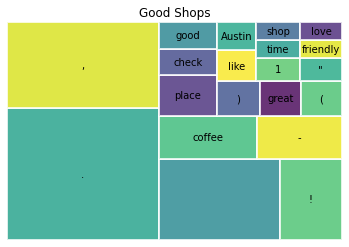

In [81]:
import squarify
import matplotlib.pyplot as plt

"""
Try to play around tha numbers and see the result
"""

wc_good_top20 = wc_good[wc_good['rank'] <= 20]

# squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
squarify.plot(sizes=wc_good_top20['pct_total'], label=wc_good_top20['word'], alpha=.8, edgecolor="white", linewidth=2)
plt.title('Good Shops')

plt.axis('off')
plt.show()

### Treemap of the "bad"

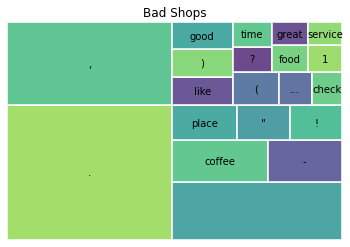

In [82]:
wc_bad_top20 = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_bad_top20['pct_total'], label=wc_bad_top20['word'], alpha=.8, edgecolor="white", linewidth=2)
plt.title('Bad Shops')
# squarify.plot(sizes=volume, label=wc_top20['word'], alpha=.8, edgecolor="white", linewidth=2)
# squarify.plot(sizes=wc['rank'], label=wc_top20['word'], alpha=.8, edgecolor="white", linewidth=2)


plt.axis('off')
plt.show()

In [42]:
# Percentage of good & bad

shops['overal'].value_counts(normalize = True)

good    0.806197
bad     0.193803
Name: overal, dtype: float64

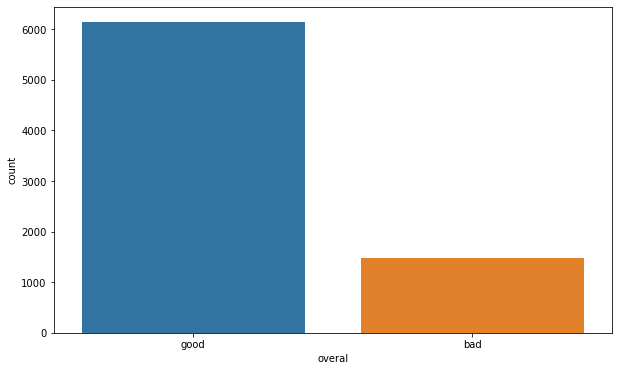

In [43]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(x ='overal', data = shops);

## With Spacy

In [44]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")
# nlp = spacy.load("en_core_web_md")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [45]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [46]:
wc = count(shops['tokens'])

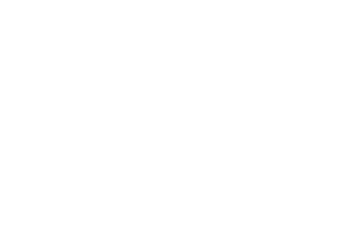

In [47]:
import squarify
import matplotlib.pyplot as plt


wc_top20 = wc[wc['rank'] <= 20]
plt.axis('off')
plt.show()


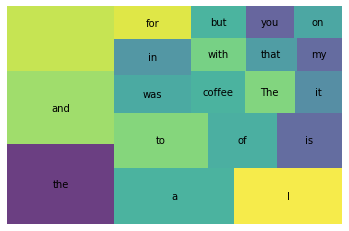

In [48]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [49]:
shops['tokens']

0       [ , 11/25/2016, 1, check-in, Love, love, loved...
1       [ , 12/2/2016, Listed, in, Date, Night:, Austi...
2       [ , 11/30/2016, 1, check-in, Listed, in, Brunc...
3       [ , 11/25/2016, Very, cool, decor!, Good, drin...
4       [ , 12/3/2016, 1, check-in, They, are, located...
                              ...                        
7611    [ , 2/19/2015, I, actually, step, into, this, ...
7612    [ , 1/21/2016, Ok,, The, Steeping, Room, IS, a...
7613    [ , 4/30/2015, Loved, coming, here, for, tea,,...
7614    [ , 8/2/2015, The, food, is, just, average., T...
7615    [ , 5/23/2015, I, finally, stopped, in, for, l...
Name: tokens, Length: 7616, dtype: object

## 3. Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

